In [4]:
import os
from datetime import datetime
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

print(os.listdir("./raw_data/"))

['avgprice_by_day_region.csv', '배달앱_및_배달대행_이용현황_20201102204429.csv', 'housetype_by_region.csv', 'numorders_by_type_region.csv', 'stores_by_type_region.csv', 'numorders_by_time_region.csv']


### 데이터 불러오기

In [5]:
avgprice_by_day = pd.read_csv("./raw_data/avgprice_by_day_region.csv")
order_by_type = pd.read_csv("./raw_data/numorders_by_type_region.csv")
order_by_time = pd.read_csv("./raw_data/numorders_by_time_region.csv")

#### 데이터프레임별 정보확인

In [6]:
avgprice_by_day.tail(3)

,date,menu,reg_sido,reg_sigu,avgprice
191303,2020-08-31,회,제주특별자치도,서귀포시,32800
191304,2020-08-31,회,충청남도,서산시,42000
191305,2020-08-31,회,충청북도,제천시,60857


In [7]:
avgprice_by_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191306 entries, 0 to 191305
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   date      191306 non-null  object
 1   menu      191306 non-null  object
 2   reg_sido  191306 non-null  object
 3   reg_sigu  191306 non-null  object
 4   avgprice  191306 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 7.3+ MB


In [8]:
order_by_time.tail(3)

,date,time,reg_sido,reg_sigu,orders
381065,2020-08-31,23,충청남도,서산시,22
381066,2020-08-31,23,충청북도,제천시,7
381067,2020-08-31,23,충청북도,충주시,1


In [9]:
order_by_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381068 entries, 0 to 381067
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   date      381068 non-null  object
 1   time      381068 non-null  int64 
 2   reg_sido  381068 non-null  object
 3   reg_sigu  381068 non-null  object
 4   orders    381068 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 14.5+ MB


In [10]:
order_by_type.tail()

,date,menu,reg_sido,reg_sigu,cnt
197187,2020-08-31,회,전라남도,나주시,2
197188,2020-08-31,회,전라북도,군산시,53
197189,2020-08-31,회,제주특별자치도,서귀포시,5
197190,2020-08-31,회,충청남도,서산시,2
197191,2020-08-31,회,충청북도,제천시,8


In [11]:
order_by_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197192 entries, 0 to 197191
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   date      197192 non-null  object
 1   menu      197192 non-null  object
 2   reg_sido  197192 non-null  object
 3   reg_sigu  197192 non-null  object
 4   cnt       197192 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 7.5+ MB


#### 서울특별시 데이터만 가져오기

In [12]:
avgprice_by_day = avgprice_by_day[
    avgprice_by_day["reg_sido"] == "서울특별시"]
avgprice_by_day.sort_values(["reg_sigu"], inplace = True)
avgprice_by_day.reset_index(drop=True, inplace=True)
avgprice_by_day.tail(3)

,date,menu,reg_sido,reg_sigu,avgprice
33175,2020-08-26,분식,서울특별시,중구,16000
33176,2020-08-24,분식,서울특별시,중구,16400
33177,2020-08-29,분식,서울특별시,중구,21750


In [13]:
order_by_time = order_by_time[
    order_by_time["reg_sido"] == "서울특별시"]
order_by_time.sort_values(["reg_sigu"], inplace = True)
order_by_time.reset_index(drop = True, inplace =True)
order_by_time.tail(3)

,date,time,reg_sido,reg_sigu,orders
69730,2020-02-20,11,서울특별시,중랑구,1
69731,2020-02-19,16,서울특별시,중랑구,1
69732,2020-02-20,15,서울특별시,중랑구,3


In [14]:
order_by_type = order_by_type[
    order_by_type["reg_sido"] == "서울특별시"]
order_by_type.sort_values(["reg_sigu"], inplace= True)
order_by_type.reset_index(drop = True, inplace= True)
order_by_type.tail(3)

,date,menu,reg_sido,reg_sigu,cnt
34415,2020-02-19,심부름,서울특별시,중랑구,4
34416,2020-02-20,심부름,서울특별시,중랑구,5
34417,2020-02-18,심부름,서울특별시,중랑구,1


In [15]:
order_by_type = order_by_type.rename({"date ":"date"}, axis = 1 )
order_by_type.date

0        2020-02-28
1        2019-10-01
2        2020-07-23
3        2020-04-14
4        2019-10-01
            ...    
34413    2020-08-25
34414    2020-02-20
34415    2020-02-19
34416    2020-02-20
34417    2020-02-18
Name: date, Length: 34418, dtype: object

In [16]:
from matplotlib import rc
rc("font", family = "Arial Unicode MS")

In [17]:
# order_by_type 데이터 분석
order_by_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34418 entries, 0 to 34417
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      34418 non-null  object
 1   menu      34418 non-null  object
 2   reg_sido  34418 non-null  object
 3   reg_sigu  34418 non-null  object
 4   cnt       34418 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


In [18]:
order_by_type.head(3)

,date,menu,reg_sido,reg_sigu,cnt
0,2020-02-28,심부름,서울특별시,강남구,14
1,2019-10-01,치킨,서울특별시,강남구,125
2,2020-07-23,심부름,서울특별시,강남구,12


### order_by_type 데이터프레임 EDA

In [19]:
# date 쪼개서 확인
order_by_type['year']  = order_by_type.date.apply(lambda x :x.split("-")[0])
order_by_type['month']  = order_by_type.date.apply(lambda x :x.split("-")[1])
order_by_type['year_month']  = order_by_type.date.apply(lambda x :"".join(x.split("-")[0:2]))
order_by_type['day']  = order_by_type.date.apply(lambda x :x.split("-")[2])

# weekday는 calendar 패키지와 datetime 패키지를 활용한다.
# calendar.day_name사용법: https://stackoverflow.com/questions/36341484/get-day-name-from-weekday-int
# datetime.strptime 문서: https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior

order_by_type['weekday'] = order_by_type.date.apply(
    lambda x : calendar.day_abbr[
        datetime.strptime(x,'%Y-%m-%d').weekday()])

order_by_type.head(3)

,date,menu,reg_sido,reg_sigu,cnt,year,month,year_month,day,weekday
0,2020-02-28,심부름,서울특별시,강남구,14,2020,02,202002,28,Fri
1,2019-10-01,치킨,서울특별시,강남구,125,2019,10,201910,01,Tue
2,2020-07-23,심부름,서울특별시,강남구,12,2020,07,202007,23,Thu


In [20]:
# 휴무일 / 업무일 컬럼 추가
def holiday(weekday):
    return "holiday" if weekday in ["Sat", "Sun"] else "workingday"
order_by_type["holiday"] = order_by_type.weekday.apply(holiday)

In [131]:
# 분리를 통해 추출된 속성은 문자열이므로 숫자열로 변환

In [141]:
order_by_type['year'] = pd.to_numeric(order_by_type.year, errors='coerce')
order_by_type['month'] = pd.to_numeric(order_by_type.month, errors='coerce')
order_by_type['year_month']  = pd.to_numeric(order_by_type.year_month, errors='coerce')
order_by_type['day'] = pd.to_numeric(order_by_type.day, errors='coerce')
order_by_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34418 entries, 0 to 34417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        34418 non-null  object
 1   menu        34418 non-null  object
 2   reg_sido    34418 non-null  object
 3   reg_sigu    34418 non-null  object
 4   cnt         34418 non-null  int64 
 5   year        34418 non-null  int64 
 6   month       34418 non-null  int64 
 7   day         34418 non-null  int64 
 8   weekday     34418 non-null  object
 9   year_month  34418 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 2.6+ MB


In [21]:
# 연, 월, 일, 시간과 배달건수 관계

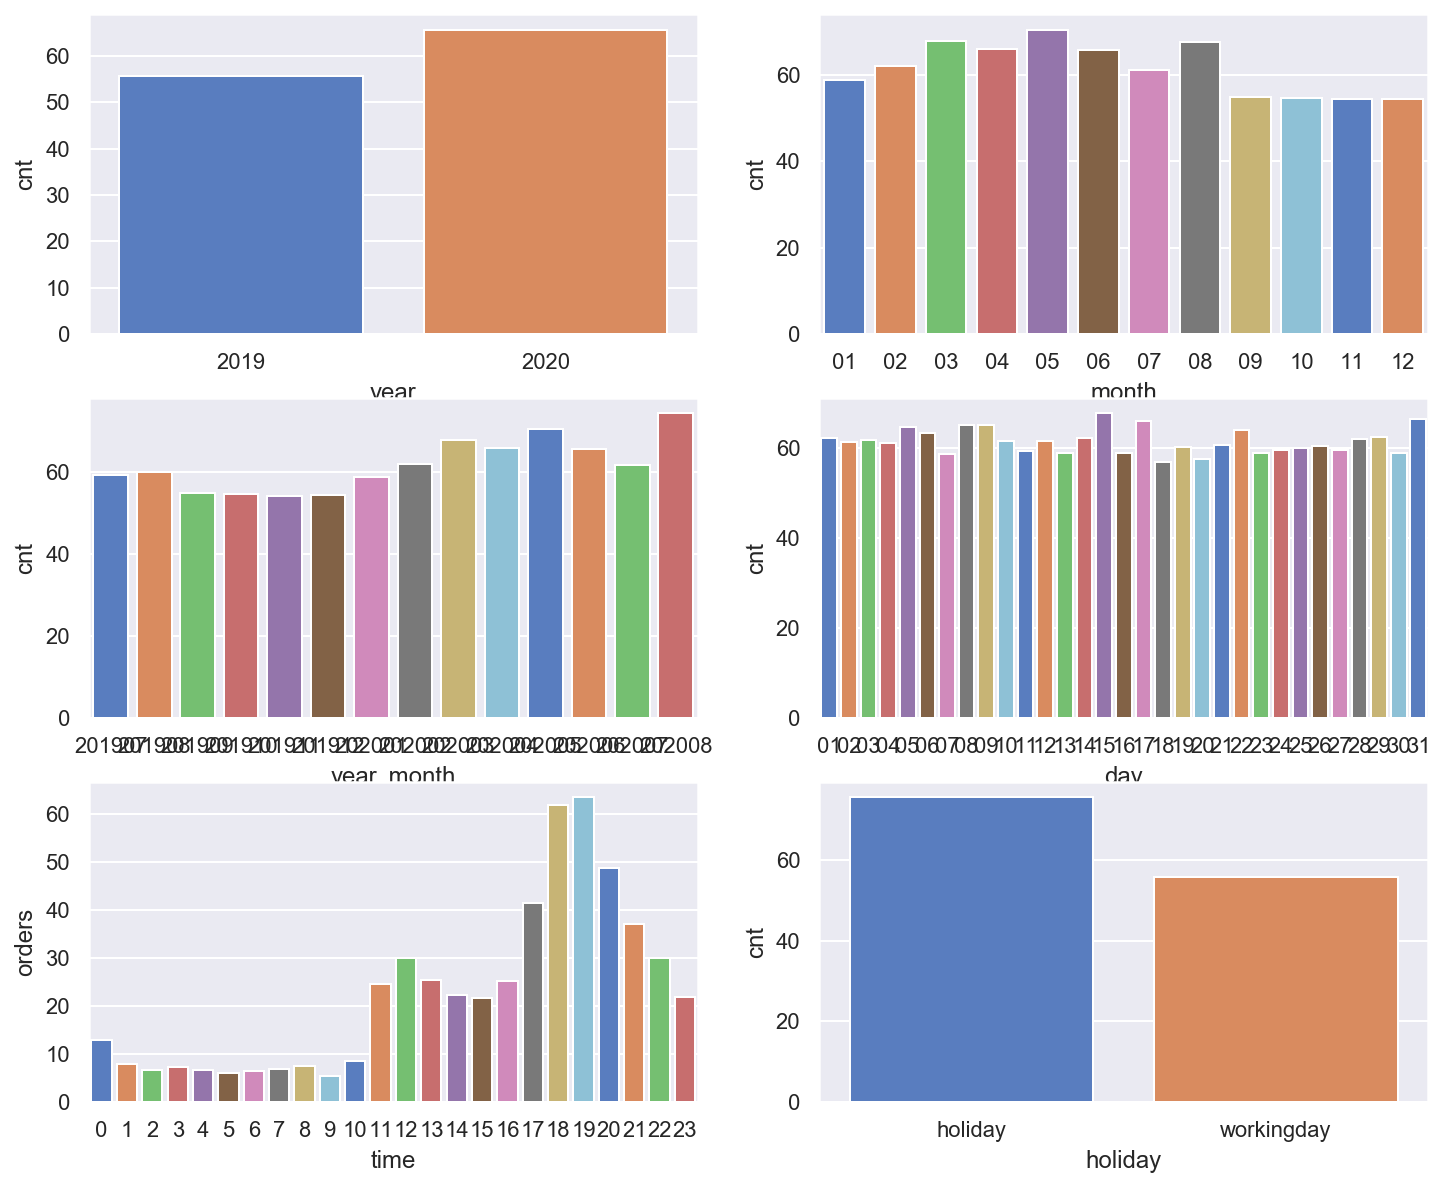

In [22]:
fig = plt.figure(figsize=[12, 10])
ax1 = fig.add_subplot(3, 2, 1)
ax1 = sns.barplot(x='year', y='cnt',
                  data=order_by_type.groupby('year')['cnt'].
                  mean().reset_index(),palette="muted")

ax2 = fig.add_subplot(3, 2, 2)
ax2 = sns.barplot(x='month', y='cnt',
                  data=order_by_type.groupby('month')['cnt'].
                  mean().reset_index(), palette="muted")

ax3 = fig.add_subplot(3, 2, 3)
ax3 = sns.barplot(x='year_month', y='cnt',
                  data=order_by_type.groupby('year_month')['cnt'].
                  mean().reset_index(), palette="muted")

ax4 = fig.add_subplot(3, 2, 4)
ax4 = sns.barplot(x='day', y='cnt',
                  data=order_by_type.groupby('day')['cnt'].mean().
                  reset_index(),palette="muted")

ax5 = fig.add_subplot(3, 2, 5)
ax5 = sns.barplot(x='time', y='orders',
                  data=order_by_time.groupby('time')['orders'].mean().
                  reset_index(), palette="muted")

ax6 = fig.add_subplot(3, 2, 6)
ax6 = sns.barplot(x='holiday', y='cnt',
                  data=order_by_type.groupby("holiday")['cnt'].mean().
                  reset_index(), palette="muted")

### 앞으로 해볼 것
- 1. 범주형 데이터(메뉴) 수치로 나타내기 
- 2. 요일별 업종, 월별 업종
- 3. 시간과 업무일 연관, 시간과 요일 그래프 그려보기


### 추가적으로 해보고 싶은 데이터 (탐색 방법의 고민이 필요함)
- 0. 시간과 메뉴 합칠 수 있는 방법 생각해보기
- 1. 주거 형태별 주문량
- 2. 날씨별 주문량 
- 3. 코로나 거리두기 단계별 주문량
- 4. 지역별 주문건수와 평균주문금액 

### 회의 후 결정내용 

- 한계점: 배달데이터 출처: kt, SKT 각각 제공-> 통신사별 배달건수로 모집단이 한정적
- kt통신 제공 배달데이터 장점 
    - 1. 최근데이터이므로 코로나 이슈에 대한 분석가능 
    - 2. 평균배달금액으로 분석가능 
- kt통신 제공 배달데이터 단점
    - 1. 지역구별 배달건수가 부정확하고, 그 격차가 매우커서 실제 배달량 분석이 어려움 

- SKT 제공데이터 장점
    - 1. 실제 SKT 통신을 통한 통화량 건수이므로 모집단 정확
- SKT 단점
    - 최근 데이터가 2019년 8월까지임
    
- 결론
    - 1. 보다 유의미한 인사이트 도출을 위하여 SKT 데이터 사용
    - 2. 코로나 팬데믹 전후의 통계량 비교를 위한 케이스에서만 KT 데이터사용
- 내가 할일
    - SKT 데이터를 이용하여 연/월/일/시간/계절 등을 기준으로 EDA 진행해보기 !